In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('headbrain.csv')

In [5]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
print(data.shape)

(237, 4)


In [7]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [10]:
# Calculate mean of X and Y to calculate Beta 1 and Beta 2
# This is to calculate the co-ordinates of the line.
mean_x=np.mean(X)
mean_y=np.mean(Y)

#Total number of values
val_count=len(X)

In [11]:
numer=0
denom=0

In [12]:
for i in range(val_count):
    numer+=(X[i]-mean_x) * (Y[i]-mean_y)
    denom+=np.square((X[i]-mean_x))

In [13]:
b1=numer/denom

In [14]:
#y=mx+c
#y=b1(x)+b2
#b2=y-b1(x)
b2=mean_y-(b1*mean_x)

In [15]:
print(b1,b2)

0.26342933948939945 325.57342104944223


In [16]:
#Our Linear Model
#BrainWeight=(0.263)*HeadSize + 325.57

In [18]:
x=np.linspace(np.min(X),np.max(X),1000)
y=b2+b1*x

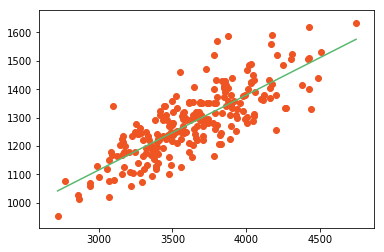

In [21]:
plt.plot(x,y,c='#58b970')
plt.scatter(X,Y,c='#ef5423')
plt.show()

In [30]:
#Now to calculate RMSE ie R^2
# rmse = sqrt(summation(1 to m)(1/m(y_mean-y)^2))

rmse=0
for i in range(val_count):
    y_pred=b2+b1*X[i]
    rmse+=np.square((Y[i]-y_pred))

rmse=np.sqrt(rmse/val_count)
print(rmse)

[72.12062138]


In [31]:
# R^2 score --- Explained variation / Total variation
# (estimated Y value - mean of Y) ^2 / (Actual Y - Mean of Y) ^2

In [32]:
r2_n=0
r2_d=0

for i in range(val_count):
    y_est=b2+b1*X[i]
    
    r2_n+=np.square(y_est - mean_y)
    r2_d+=np.square(Y[i]-mean_y)
print(r2_n/r2_d)

[0.63931172]


In [29]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
X=X.reshape((val_count,1))
reg=reg.fit(X,Y)

r2_score=reg.score(X,Y)
print(r2_score)

0.639311719957
